## Implementación de PCA

Importe de librerías necesarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
import time
from sklearn.linear_model import LogisticRegression

Cargamos los datos al notebook

In [3]:
data = pd.read_csv('data_cleaner.csv')
X = data.drop(['AdoptionLikelihood'], axis=1).to_numpy()
y = data['AdoptionLikelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se define la función para encontrar el número de componentes óptimo de los datos cuando tenemos una regresión logística

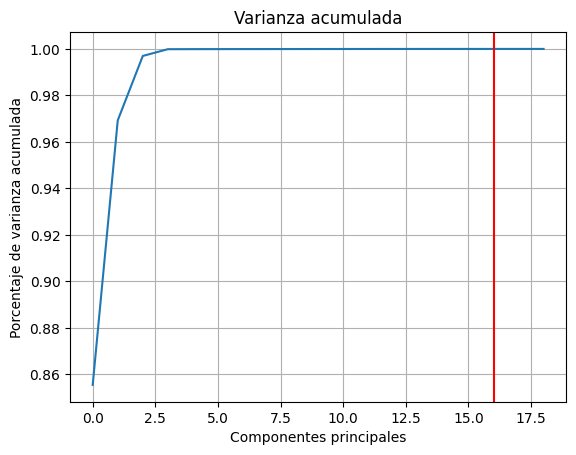

In [4]:
pca_varianza = PCA(n_components=X.shape[1]).fit(X)
plt.plot(np.cumsum(pca_varianza.explained_variance_/np.sum(pca_varianza.explained_variance_)))
plt.axvline(x=16, c= 'r')
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

In [5]:
def aplicar_pca_y_entrenar(modelo, n_comp, X, Y):
    start = time.time()

    # Aplicar PCA
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_comp)])

    # Entrenar el modelo sobre todo el conjunto transformado
    modelo.fit(X_pca, Y)
    y_pred = modelo.predict(X_pca)

    # Obtener probabilidades para ROC AUC
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_pca)[:, 1]
    else:
        y_proba = modelo.decision_function(X_pca)

    # Métricas
    precision = precision_score(Y, y_pred)
    recall = recall_score(Y, y_pred)
    auc = roc_auc_score(Y, y_proba)
    elapsed = time.time() - start

    return precision, recall, auc, elapsed, X_pca_df

In [6]:
modelo = LogisticRegression(max_iter=1000)
precision, recall, auc, tiempo, X_pca_df = aplicar_pca_y_entrenar(
    modelo, n_comp=16, X=X, Y=y
)

print(f"Precisión: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"ROC AUC:   {auc:.3f}")
print(f"Tiempo:    {tiempo:.2f} s")

Precisión: 0.669
Recall:    0.543
ROC AUC:   0.817
Tiempo:    1.53 s


In [7]:
modelo1 = SVC(C=10, class_weight=None, degree=2, gamma='scale', kernel='linear', probability=True)
precision, recall, auc, tiempo, X_pca_df = aplicar_pca_y_entrenar(
    modelo1, n_comp=16, X=X, Y=y
)

print(f"Precisión: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"ROC AUC:   {auc:.3f}")
print(f"Tiempo:    {tiempo:.2f} s")

Precisión: 0.667
Recall:    0.546
ROC AUC:   0.815
Tiempo:    1610.26 s
